<a href="https://colab.research.google.com/github/laythamra28/DeepLearning-Project/blob/main/LeNet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os
import numpy as np
import torch
import torch.nn as nn

In [ ]:
%cd drive/Shareddrives/'BE 500'/Dataset

/content/drive/Shareddrives/BE 500/Dataset


In [ ]:
%cd ..

/content/drive/Shareddrives/BE 500


In [ ]:
#load in training variables and testing variables
X_train=np.load('X_train.npy')
y_train=np.load('y_train.npy')
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)

X_val = np.load('X_val.npy')
y_val = np.load('y_val.npy')
X_val = X_val.astype(np.float32)
y_val = y_val.astype(np.float32)

X_test=np.load('X_test.npy')
y_test=np.load('y_test.npy')
X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.float32)

In [ ]:
#Combine X_test and X_val
X_test_val=np.concatenate((X_val,X_test))
#Combine y_test and y_val
y_test_val=np.concatenate((y_val,y_test))
#y_test_val=torch.from_numpy(y_test_val)

In [ ]:
#Reshape X test
Xtest=torch.from_numpy(X_test)
Xtest=Xtest.reshape((100,1,480,640))

Xtestval=torch.from_numpy(X_test_val)
Xtestval=Xtestval.reshape((250,1,480,640))

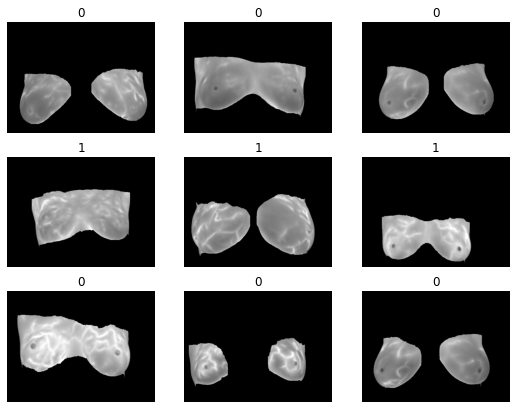

In [ ]:
#Print out the first 9 images in training set and their labels
fig, ax = plt.subplots(3, 3,figsize=(9,7))
for i in range(9):
  im=X_train[i,:,:]
  ax[i//3,i%3].imshow(im,cmap='gray')
  ax[i//3, i%3].set_title(int(y_train[i][0]))
  ax[i//3,i%3].axis('off')

# LeNet5 Architecture

Documentation: https://www.datasciencecentral.com/lenet-5-a-classic-cnn-architecture/



In [ ]:
num_classes = 1

class LeNet5(nn.Module):
    def __init__(self, num_classes):
      super().__init__()

      # First layer
      self.conv1 = torch.nn.Conv2d(1,6,kernel_size=5, stride=1, padding=0)
      #self.bnorm = torch.nn.BatchNorm2d(6)
      self.relu1 = torch.nn.ReLU()
      self.pool1 = torch.nn.MaxPool2d(kernel_size = 2, stride = 2)

      # Second layer
      self.conv2 = torch.nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0)
      #self.bnorm2 = torch.nn.BatchNorm2d(16)
      self.relu2 = torch.nn.ReLU()
      self.pool2 = torch.nn.MaxPool2d(kernel_size = 2, stride = 2)

      self.flatten=torch.nn.Flatten()

      self.fc = torch.nn.Linear(293904, 400)
      self.relu3 = torch.nn.ReLU()

      self.fc1 = torch.nn.Linear(400, 120)
      self.relu4 = torch.nn.ReLU()

      self.fc2 = torch.nn.Linear(120, 84)
      self.relu5 = torch.nn.ReLU()

      self.fc3 = torch.nn.Linear(84, num_classes)

      self.sigmoid=nn.Sigmoid()
        
    def forward(self, x):

      out = self.conv1(x)
      out = self.relu1(out)
      out = self.pool1(out)
      out = self.conv2(out)
      out = self.relu2(out)
      out = self.pool2(out)
      out = self.flatten(out)
      out = self.fc(out)
      out = self.relu3(out)
      out = self.fc1(out)
      out = self.relu4(out)
      out = self.fc2(out)
      out = self.relu5(out)
      out = self.fc3(out)
      out = self.sigmoid(out)

      return out

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
Xtest=Xtest.to(device)
Xtestval = Xtestval.to(device)

Xtrain=torch.from_numpy(X_train)
Xtrain=Xtrain.reshape((750,1,480,640))
Xtrain=Xtrain.to(device)


torch.manual_seed(0)
m=LeNet5(num_classes)
m=m.to(device)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(m.parameters(), lr = .000001)

ytrain=torch.from_numpy(y_train)
ytrain=ytrain.to(device)

from torch.utils.data import DataLoader,TensorDataset, random_split

dataset = TensorDataset(Xtrain, ytrain)
trainloader=DataLoader(dataset=dataset,batch_size=64)

In [ ]:
lossy=np.zeros(100)

import time
start_time=time.time() # record training time

for epoch in range(100):
  for x,y in trainloader:
    pred_y = m(x)
 
    # Compute and print loss
    loss = criterion(pred_y, y)
    lossy[epoch]=loss
 
    # Zero gradients, perform a backward pass,
    # and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print('epoch {}: loss = {}'.format(epoch,loss.item()))

print(f'Training Time = {time.time()-start_time}')

In [ ]:
LeNet_loss = lossy 
%cd drive/Shareddrives/'BE 500'
np.save('LeNet_loss',LeNet_loss)

In [ ]:
# define plot style (make it pretty :))
import seaborn as sns
sns.set(font='Franklin Gothic Book',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})

sns.set_context("notebook", rc={"font.size":16,
                                "axes.titlesize":20,
                                "axes.labelsize":18})

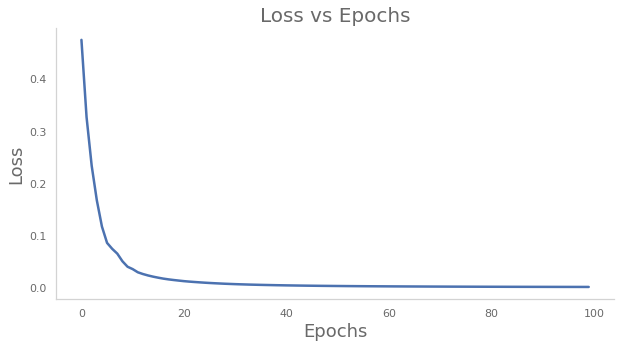

In [ ]:
plt.figure(figsize=(10, 5))
ax = sns.lineplot(data=lossy,palette='deep',linewidth=2.5)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()

In [ ]:
m=m.to(device)

## Testing on Test set

In [ ]:
with torch.no_grad():
    z = m(Xtest.to(device))

y_pred=z.round()

ypred=y_pred.cpu().detach().numpy()

In [ ]:
acc=sum(ypred==y_test)/len(y_test)
acc=acc[0]
print(f'Accuracy={acc*100}')

Accuracy=93.0


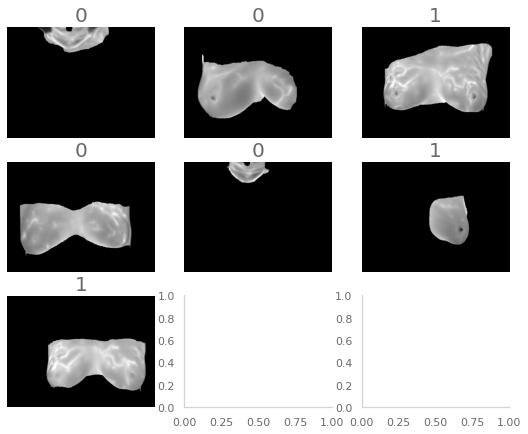

In [ ]:
fig, ax = plt.subplots(3, 3,figsize=(9,7))
count = 0
for i in range(len(y_test)):
  if count < 9: 
    if ypred[i]!=y_test[i]:
      im = X_test[i,:,:]
      ax[count//3,count%3].imshow(im,cmap='gray')
      ax[count//3,count%3].set_title(int(y_test[i][0]))
      ax[count//3,count%3].axis('off')
      count+=1

## Testing on Test+Val set

In [ ]:
with torch.no_grad():
    z = m(Xtestval.to(device))

y_pred=z.round()

ypred=y_pred.cpu().detach().numpy()

In [ ]:
acc=sum(ypred==y_test_val)/len(y_test_val)
acc=acc[0]
print(f'Accuracy={acc*100}')

Accuracy=94.0


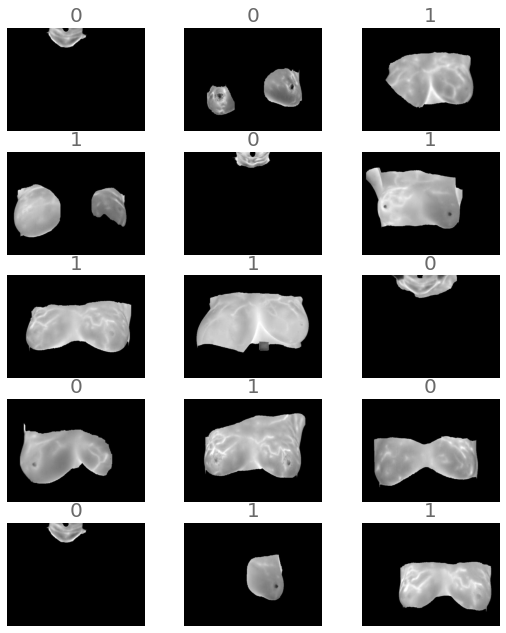

In [ ]:
fig, ax = plt.subplots(5,3,figsize=(9,11))
count = 0
for i in range(len(y_test_val)):
  if count < 15: 
    if ypred[i]!=y_test_val[i]:
      im = X_test_val[i,:,:]
      ax[count//3,count%3].imshow(im,cmap='gray')
      ax[count//3,count%3].set_title(int(y_test_val[i][0]))
      ax[count//3,count%3].axis('off')
      count+=1

In [ ]:
import seaborn as sns
sns.set(font='Franklin Gothic Book',
        rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})

sns.set_context("notebook", rc={"font.size":16,
                                "axes.titlesize":20,
                                "axes.labelsize":18})

[Errno 2] No such file or directory: 'drive/Shareddrives/BE 500'
/content/drive/Shareddrives/BE 500


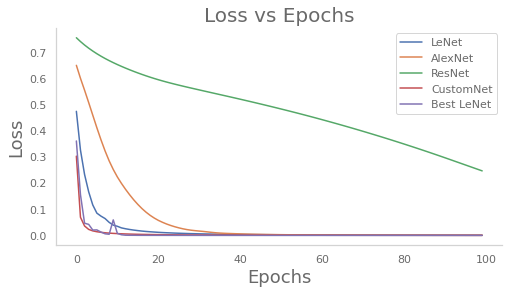

In [ ]:
%cd drive/Shareddrives/'BE 500'

# plot all learning curves
LeNet = np.load('LeNet_loss.npy')
AlexNet = np.load('Alexnet_loss.npy')
ResNet = np.load('Resnet_Loss.npy')
CustomNet = np.load('VGG_loss.npy')
bestLeNet = np.load('bestLeNet_loss.npy')
plt.figure(figsize=(8, 4))

plt.plot(LeNet,label = "LeNet")
plt.plot(AlexNet,label = "AlexNet")
plt.plot(ResNet,label = "ResNet")
plt.plot(CustomNet,label = "CustomNet")
plt.plot(bestLeNet,label = "Best LeNet")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.legend()
plt.show()

In [ ]:
!jupyter nbconvert --to html "LeNet5.ipynb"